<a href="https://colab.research.google.com/github/LaneanL/Statistics/blob/main/World_Bank_Education_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Bank Education Data Analysis

## Analysis withPython

## Loading the Data

### Data taken from [World Bank Repository](https://colab.research.google.com/drive/1q3u7L23foalWq74TJUZO0g-c7QIjjuMn#scrollTo=W1WsOvCUb8FT&line=1&uniqifier=1)

In [ ]:
import pandas as pd


In [ ]:
main_data = pd.read_csv("/content/API_4_DS2_en_csv_v2_5608370.csv",skiprows=4)
main_data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,54.495678,54.588701,54.585630,54.674206,54.873448,55.181477,...,69.620827,69.352325,69.027743,68.681269,68.320569,67.962515,67.712003,67.657094,67.617079,NaN
1,Aruba,ABW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.131043,42.949419,42.852732,42.661157,42.359159,41.936664,...,19.045505,18.799607,18.571721,18.334859,18.069771,17.767339,17.351022,16.799407,16.240782,NaN
2,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
country_data=pd.read_csv("/content/Metadata_Country_API_4_DS2_en_csv_v2_5608370.csv")
country_data.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [ ]:
indicator_data=pd.read_csv("/content/Metadata_Indicator_API_4_DS2_en_csv_v2_5608370.csv")
indicator_data.head()

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.POP.1564.TO.ZS,Population ages 15-64 (% of total population),Total population between the ages 15 to 64 as ...,United Nations Population Division. World Popu...,NaN
1,SP.POP.0014.TO.ZS,Population ages 0-14 (% of total population),Population between the ages 0 to 14 as a perce...,United Nations Population Division. World Popu...,NaN
2,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",Unemployment refers to the share of the labor ...,International Labour Organization. “ILO Modell...,NaN
3,SL.UEM.TOTL.MA.ZS,"Unemployment, male (% of male labor force) (mo...",Unemployment refers to the share of the labor ...,International Labour Organization. “ILO Modell...,NaN
4,SL.UEM.TOTL.FE.ZS,"Unemployment, female (% of female labor force)...",Unemployment refers to the share of the labor ...,International Labour Organization. “ILO Modell...,NaN


## Cleaning the Data

### Creating Dataset

In [ ]:
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

In [ ]:
main_data['Indicator Name'].unique()

array(['Population ages 15-64 (% of total population)',
       'Population ages 0-14 (% of total population)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Unemployment, male (% of male labor force) (modeled ILO estimate)',
       'Unemployment, female (% of female labor force) (modeled ILO estimate)',
       'Labor force, total',
       'Labor force, female (% of total labor force)',
       'Probability of dying among youth ages 20-24 years (per 1,000)',
       'Probability of dying among adolescents ages 15-19 years (per 1,000)',
       'Probability of dying among adolescents ages 10-14 years (per 1,000)',
       'Probability of dying among children ages 5-9 years (per 1,000)',
       'Number of deaths ages 20-24 years',
       'Number of deaths ages 15-19 years',
       'Number of deaths ages 10-14 years',
       'Number of deaths ages 5-9 years',
       'Government expenditure on education, total (% of GDP)',
       'Government expenditure o

### View data with *Indicator Name-'Unemployment, female (% of female labor force) (modeled ILO estimate)'*



In [ ]:
main_data_unem = main_data[main_data['Indicator Name']=='Unemployment, female (% of female labor force) (modeled ILO estimate)']
main_data_unem.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
4,Aruba,ABW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Africa Eastern and Southern,AFE,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.031243,7.222851,7.373213,7.455046,7.417153,7.620242,8.120845,8.495898,8.510631,NaN
328,Afghanistan,AFG,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.306000,11.538000,12.783000,14.017000,13.924000,13.881000,16.783000,NaN,NaN,NaN
490,Africa Western and Central,AFW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.015900,4.231848,4.096891,4.107897,4.196894,4.249169,4.808800,4.898207,4.771260,NaN
652,Angola,AGO,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.146000,9.172000,9.196000,9.171000,9.181000,9.164000,9.896000,10.122000,9.961000,NaN


In [ ]:
main_data_unem=main_data_unem[['Country Name', 'Country Code',
       '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]
main_data_unem.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Africa Eastern and Southern,AFE,7.322141,7.300528,7.231113,7.167484,7.118746,7.171858,7.241586,7.247183,...,7.007461,7.031243,7.222851,7.373213,7.455046,7.417153,7.620242,8.120845,8.495898,8.510631
328,Afghanistan,AFG,10.697000,10.746000,10.691000,10.675000,10.839000,10.735000,10.652000,10.647000,...,10.392000,10.306000,11.538000,12.783000,14.017000,13.924000,13.881000,16.783000,NaN,NaN
490,Africa Western and Central,AFW,4.160187,4.355305,4.389428,4.391232,4.377008,4.402271,4.454056,4.498095,...,3.894572,4.015900,4.231848,4.096891,4.107897,4.196894,4.249169,4.808800,4.898207,4.771260
652,Angola,AGO,3.829000,3.805000,3.819000,3.688000,3.593000,3.546000,3.512000,3.467000,...,8.665000,9.146000,9.172000,9.196000,9.171000,9.181000,9.164000,9.896000,10.122000,9.961000


No data prior to 1991-> filtered for 1991 to 2022 and *Country Name* and *Country Code*

In [ ]:
country_data.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')

Filter for *Country Code*, *Region*, and *IncomeGroup*


In [ ]:
country_data=country_data[['Country Code', 'Region', 'IncomeGroup']]
country_data.head()

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFE,NaN,NaN
2,AFG,South Asia,Low income
3,AFW,NaN,NaN
4,AGO,Sub-Saharan Africa,Lower middle income


Merge data *main_data_unem* with *country_data*

In [ ]:
merged_data= pd.merge(main_data_unem,country_data,on='Country Code')
merged_data.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2015,2016,2017,2018,2019,2020,2021,2022,Region,IncomeGroup
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Africa Eastern and Southern,AFE,7.322141,7.300528,7.231113,7.167484,7.118746,7.171858,7.241586,7.247183,...,7.222851,7.373213,7.455046,7.417153,7.620242,8.120845,8.495898,8.510631,NaN,NaN
2,Afghanistan,AFG,10.697000,10.746000,10.691000,10.675000,10.839000,10.735000,10.652000,10.647000,...,11.538000,12.783000,14.017000,13.924000,13.881000,16.783000,NaN,NaN,South Asia,Low income
3,Africa Western and Central,AFW,4.160187,4.355305,4.389428,4.391232,4.377008,4.402271,4.454056,4.498095,...,4.231848,4.096891,4.107897,4.196894,4.249169,4.808800,4.898207,4.771260,NaN,NaN
4,Angola,AGO,3.829000,3.805000,3.819000,3.688000,3.593000,3.546000,3.512000,3.467000,...,9.172000,9.196000,9.171000,9.181000,9.164000,9.896000,10.122000,9.961000,Sub-Saharan Africa,Lower middle income


## Exploratory Data Analysis

View which rows have NA data

In [ ]:
merged_data.isna().sum()


Country Name     0
Country Code     0
1991            30
1992            30
1993            30
1994            30
1995            30
1996            30
1997            30
1998            30
1999            30
2000            30
2001            30
2002            30
2003            30
2004            30
2005            30
2006            30
2007            30
2008            30
2009            30
2010            30
2011            30
2012            30
2013            30
2014            30
2015            30
2016            30
2017            30
2018            30
2019            30
2020            30
2021            32
2022            36
Region          48
IncomeGroup     49
dtype: int64

In [ ]:
merged_data_clean = merged_data.dropna()
merged_data_clean.shape   ##how many rows/columns

(182, 36)

In [ ]:
grouped_data_income = merged_data_clean.groupby(['IncomeGroup']).describe()   #describe() method-calculates statistical data percentile, mean and std
grouped_data_income

1991                                               \
                    count       mean       std    min      25%     50%   
IncomeGroup                                                              
High income          60.0   8.309783  5.935488  1.089  3.27575  6.9745   
Low income           25.0   6.150440  6.027049  0.291  2.48800  3.9090   
Lower middle income  50.0   9.160580  8.857551  0.542  2.52300  5.5185   
Upper middle income  47.0  10.232128  8.395304  0.500  3.40500  7.9750   

                                       1992             ...      2021          \
                          75%     max count       mean  ...       75%     max   
IncomeGroup                                             ...                     
High income          11.63600  25.395  60.0   8.710317  ...   8.56775  21.529   
Low income            5.83600  23.404  25.0   6.030040  ...   7.59100  30.453   
Lower middle income  13.08475  38.164  50.0   9.116200  ...  14.65300  37.901   
Upper middle income  15.09800  31.282  47.0  10.852468  ...  17.85300  42.551   

                     2022                                                \
                    count       mean       std    min      25%      50%   
IncomeGroup                                                               
High income          60.0   6.346433  3.877112  0.322  3.53550   5.0425   
Low income           25.0   8.130720  8.702621  0.386  2.96300   4.2950   
Lower middle income  50.0  10.163520  8.088881  0.432  4.52725   7.0410   
Upper middle income  47.0  11.379702  9.070709  0.898  4.15700  10.0320   

                                       
                          75%     max  
IncomeGroup                            
High income           7.80275  19.486  
Low income            7.39500  30.170  
Lower middle income  14.84800  37.879  
Upper middle income  14.96150  42.014  

[4 rows x 256 columns]

In [ ]:
grouped_data_income = merged_data_clean.groupby(['IncomeGroup']).mean()   # calc mean
grouped_data_income

<ipython-input-35-be9599568184>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_income = merged_data_clean.groupby(['IncomeGroup']).mean()   # calc mean


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
IncomeGroup,,,,,,,,,,,,,,,,,,,,,
High income,8.309783,8.710317,9.604850,9.779200,9.510917,9.584300,9.179333,8.967283,8.969300,8.722533,...,9.293217,8.952083,8.483367,8.045833,7.489300,6.863067,6.499417,7.711833,7.262800,6.346433
Low income,6.150440,6.030040,5.870640,6.117160,6.207560,6.270440,6.357760,6.456600,6.519600,6.766160,...,7.641560,7.611280,7.600360,7.545320,7.488360,7.389160,7.401040,8.141200,8.240200,8.130720
Lower middle income,9.160580,9.116200,9.365160,9.444160,9.463440,9.288960,9.288200,9.357140,9.407920,9.470720,...,9.357920,9.272320,9.480260,9.494820,9.504420,9.326580,9.310440,10.414520,10.285780,10.163520
Upper middle income,10.232128,10.852468,11.260447,11.689745,12.168894,12.966043,13.005766,13.081255,13.107085,12.840149,...,11.816383,11.800532,11.826511,11.851319,11.616085,11.300319,11.204340,12.178000,12.220319,11.379702


In [ ]:
 transposed_income_group = grouped_data_income.transpose()   # transpose data for box plot
 transposed_income_group

IncomeGroup,High income,Low income,Lower middle income,Upper middle income
1991,8.309783,6.15044,9.16058,10.232128
1992,8.710317,6.03004,9.11620,10.852468
1993,9.604850,5.87064,9.36516,11.260447
1994,9.779200,6.11716,9.44416,11.689745
1995,9.510917,6.20756,9.46344,12.168894
1996,9.584300,6.27044,9.28896,12.966043
1997,9.179333,6.35776,9.28820,13.005766
1998,8.967283,6.45660,9.35714,13.081255
1999,8.969300,6.51960,9.40792,13.107085
2000,8.722533,6.76616,9.47072,12.840149


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline    #run mathplotlib when executed

Text(0, 0.5, '% Unemployed')

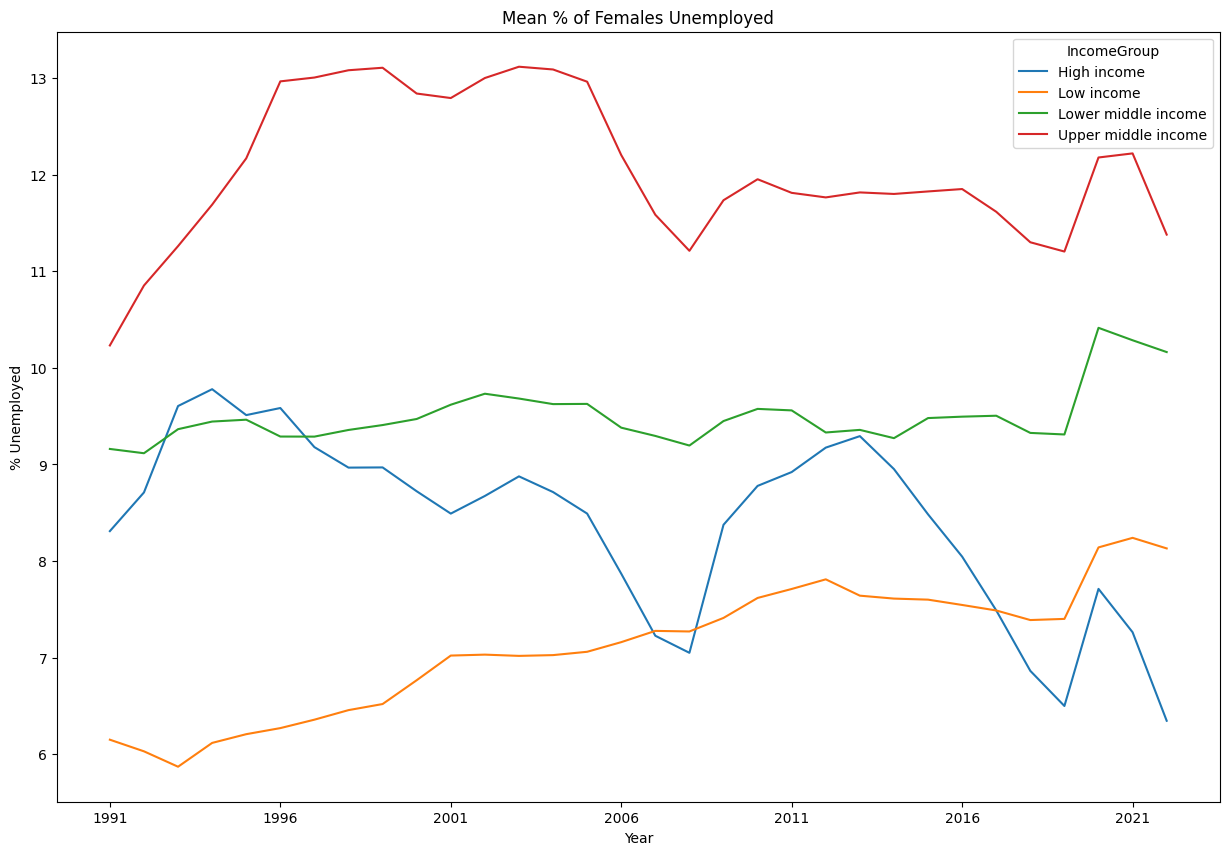

In [ ]:
transposed_income_group.plot(figsize=(15,10))
plt.title("Mean % of Females Unemployed")
plt.xlabel("Year")
plt.ylabel("% Unemployed")

<ipython-input-51-253790e23c62>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_region = merged_data_clean.groupby(['Region']).mean ()


Text(0, 0.5, '% Unemployed')

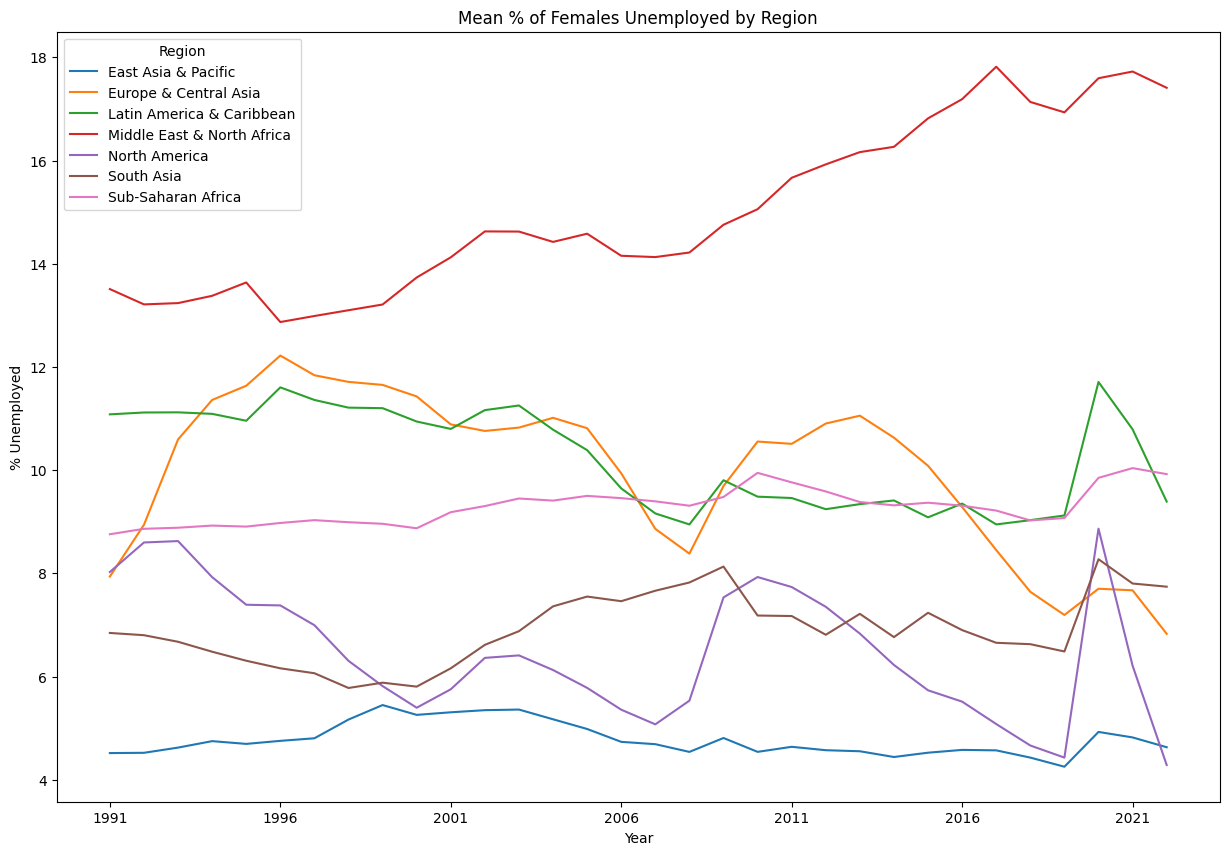

In [ ]:
grouped_data_region = merged_data_clean.groupby(['Region']).mean ()  #calc mean by region
transposed_region = grouped_data_region.transpose()                  #transpose data

transposed_region.plot(figsize=(15,10))
plt.title("Mean % of Females Unemployed by Region")
plt.xlabel("Year")
plt.ylabel("% Unemployed")


## ANOVA

In [ ]:
import scipy.stats as stats

In [ ]:
merged_data_clean.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2015,2016,2017,2018,2019,2020,2021,2022,Region,IncomeGroup
4,Angola,AGO,3.829,3.805,3.819,3.688,3.593,3.546,3.512,3.467,...,9.172,9.196,9.171,9.181,9.164,9.896,10.122,9.961,Sub-Saharan Africa,Lower middle income
5,Albania,ALB,10.272,27.083,22.996,18.897,14.109,12.917,15.734,19.778,...,17.115,14.477,12.511,11.876,11.324,12.758,12.609,11.755,Europe & Central Asia,Upper middle income
8,United Arab Emirates,ARE,2.596,2.531,2.489,2.411,2.361,2.440,2.504,2.621,...,4.491,4.251,7.579,6.257,5.990,5.818,6.796,6.411,Middle East & North Africa,High income
9,Argentina,ARG,5.748,6.711,12.558,13.927,22.212,19.200,17.641,14.034,...,8.645,9.250,9.491,10.563,10.712,12.390,9.858,7.303,Latin America & Caribbean,Upper middle income
10,Armenia,ARM,2.100,2.372,7.315,8.465,9.988,14.474,16.692,13.391,...,10.917,11.024,11.369,11.493,10.431,9.633,10.720,10.593,Europe & Central Asia,Upper middle income


In [ ]:
income_groups = merged_data_clean['IncomeGroup'].unique()        #create an array of unique values of income group
income_groups

array(['Lower middle income', 'Upper middle income', 'High income',
       'Low income'], dtype=object)

In [ ]:
income_group_data = []
for i in range(len(income_groups)):    # for loop to look through datset for all the income groups
    income_group_data.append(merged_data_clean['2019'][merged_data_clean['IncomeGroup']==income_groups[i]])   #merged data income group compared to income_groups **one column-year
income_group_data

[4       3.829
 18      0.584
 20      2.084
 28      2.825
 32      1.566
 41      7.047
 42      6.403
 44     21.563
 46      5.636
 47     12.312
 56     38.164
 60     16.579
 67     21.007
 83      3.520
 85      3.804
 97      5.401
 100     8.802
 109     6.761
 111    24.467
 117    29.772
 120     3.557
 121     1.044
 122     1.209
 128     2.619
 129    10.969
 137    22.742
 140    18.637
 147    13.225
 162     6.789
 165    12.508
 173     4.075
 174     7.630
 177    12.664
 183     0.542
 186     4.131
 188     1.932
 206     7.433
 208     1.309
 218    17.706
 223    23.456
 233     1.779
 236     4.207
 242    17.769
 245     4.364
 251     2.375
 256     1.902
 257     1.581
 259     2.491
 263    22.133
 264     3.125
 Name: 1991, dtype: float64,
 5      10.272
 9       5.748
 10      2.100
 15      0.963
 21     10.968
 24     21.480
 25      0.500
 26     14.332
 29      8.038
 33     16.973
 40      2.062
 45     13.845
 48      7.084
 50     12.509
 59     10.

In [ ]:
statistic, pvalue = stats.f_oneway(income_group_data[0],income_group_data[1],income_group_data[2],income_group_data[3])   # f one way function
print("Statistic: %s pvalue %s"%(statistic,pvalue))

if pvalue < 0.05:
  print("Significant")
else:
  print("Not Significant")

Statistic: 1.7275648730083206 pvalue 0.16301167691902987
Not Significant


### Region Statistics

In [ ]:
region_groups = merged_data_clean['Region'].unique()        #create an array of unique values of income group
region_groups

array(['Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'South Asia', 'North America'], dtype=object)

In [ ]:
region_group_data = []
for i in range(len(region_groups)):    # for loop to look through datset for all the region groups
    region_group_data.append(merged_data_clean['2019'][merged_data_clean['Region']==region_groups[i]])   #merged data income group compared to region_groups **one column-year
region_group_data

[4       9.164
 16      0.856
 18      1.736
 19      4.639
 33     21.966
 34      6.457
 41      3.011
 42      4.145
 43      3.745
 44     21.855
 46     10.261
 47     11.618
 69      6.378
 72      4.289
 80     28.274
 83      3.594
 85      5.067
 86      3.217
 87      2.711
 88      9.176
 120     5.252
 130     2.361
 140    19.062
 150     1.877
 157     1.563
 164     3.730
 165    11.598
 166     9.720
 167     5.772
 170    18.753
 172     0.472
 173     4.895
 202    13.515
 205    28.444
 206     3.044
 209     2.159
 212    24.383
 215    13.154
 218    20.272
 223    24.549
 228     0.766
 231     2.800
 245     2.777
 246     4.046
 262    27.068
 263     5.215
 264     6.990
 Name: 2019, dtype: float64,
 5      11.324
 10     10.431
 14      4.351
 15      5.691
 17      4.940
 21      3.869
 24     18.754
 25      3.203
 37      4.709
 38      7.110
 53      8.009
 54      2.375
 55      2.734
 58      5.269
 70     15.990
 71      4.921
 75      6.164
 77      8.

In [ ]:
statistic, pvalue = stats.f_oneway(region_group_data[0],region_group_data[1],region_group_data[2],region_group_data[3],
                                   region_group_data[4],region_group_data[5],region_group_data[6])   # f one way function
print("Statistic: %s pvalue %s"%(statistic,pvalue))

if pvalue < 0.05:
  print("Significant")
else:
  print("Not Significant")

Statistic: 8.167225791095175 pvalue 8.535650990864875e-08
Significant


### Boxplot by Income

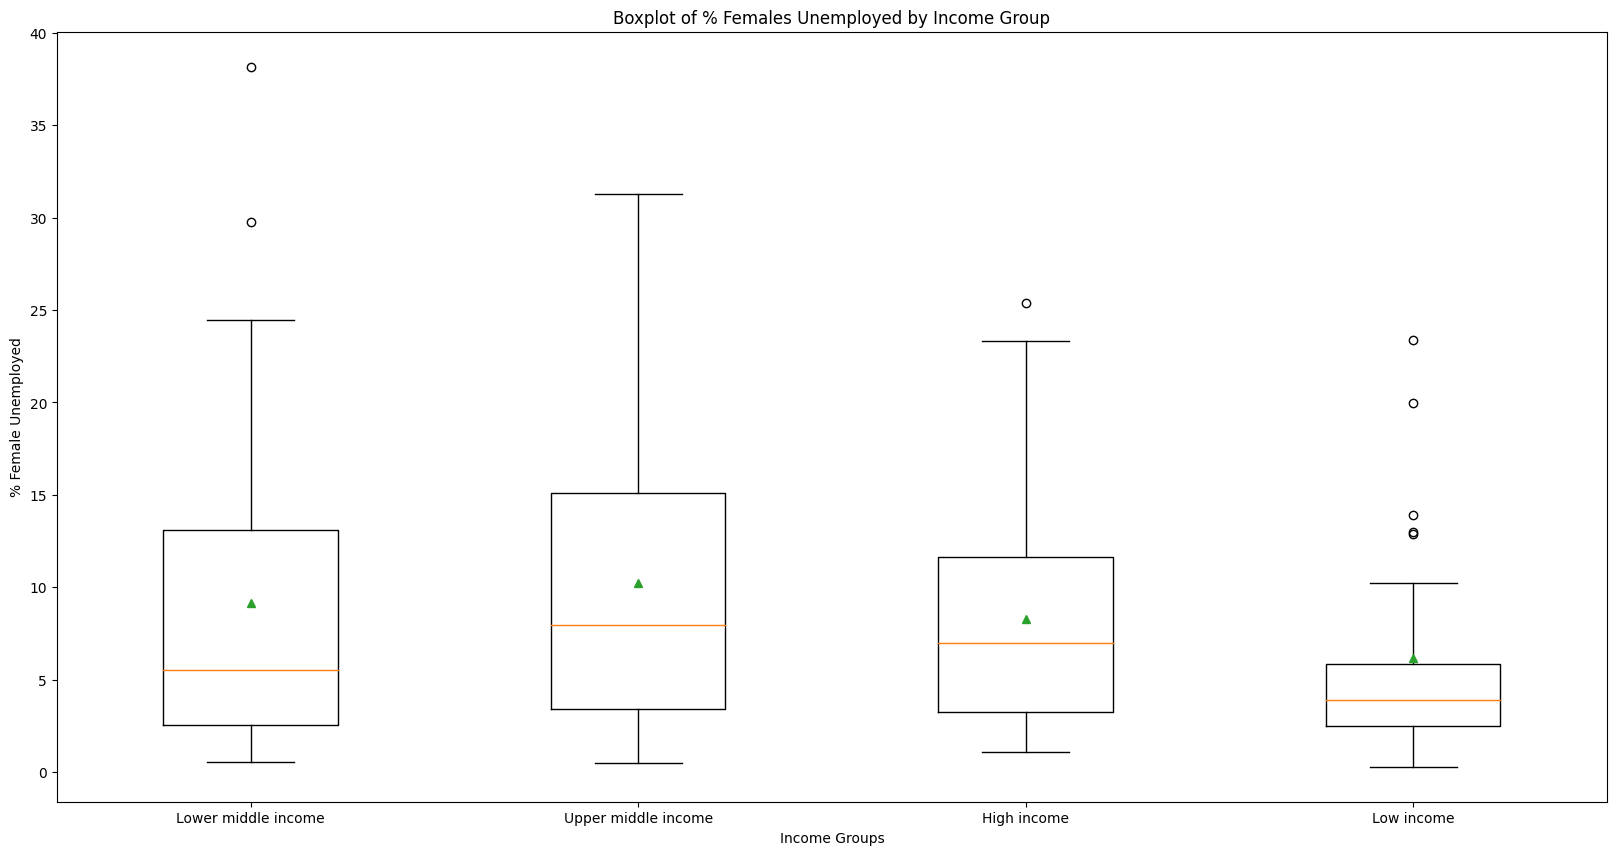

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.set_title("Boxplot of % Females Unemployed by Income Group")
ax.set

ax.boxplot(income_group_data,labels=income_groups,showmeans=True)
plt.xlabel("Income Groups")
plt.ylabel("% Female Unemployed")
plt.show()

### Boxplot by Region

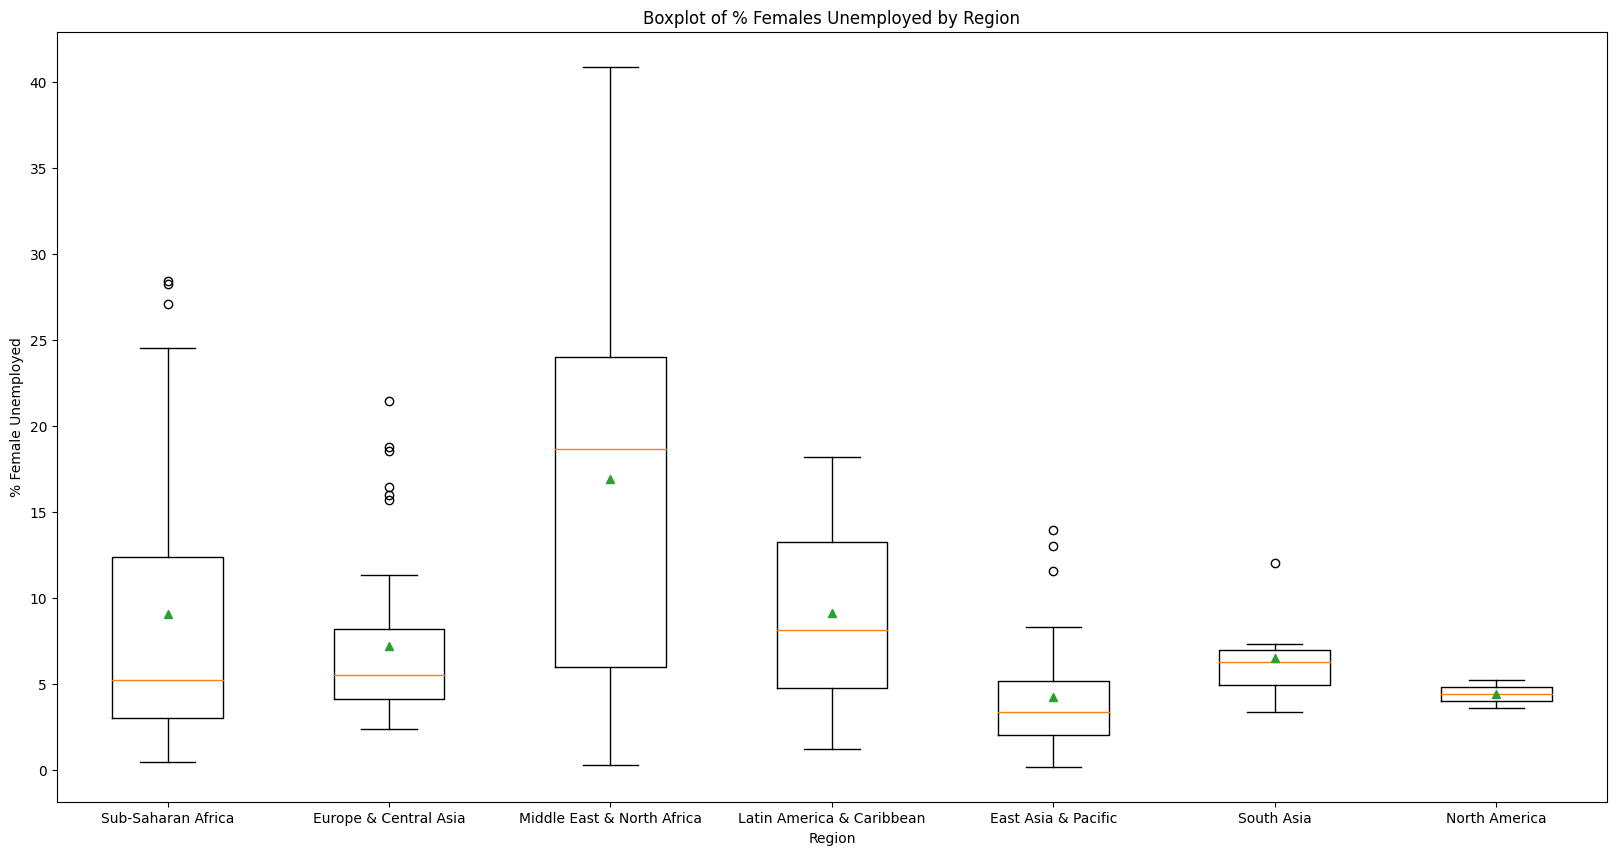

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.set_title("Boxplot of % Females Unemployed by Region")
ax.set

ax.boxplot(region_group_data,labels=region_groups,showmeans=True)
plt.xlabel("Region")
plt.ylabel("% Female Unemployed")
plt.show()

### Green arrows =mean; circles=outliers